In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import folium
import branca
import json

In [2]:
#series is a pandas series with fips code index and values for map coloring
def county_map(series, map_tiles='cartodbpositron', color="YlOrRd", steps=6):
    
            
    series_max = series.quantile(.99)
    series_min = series.quantile(.01)
    

    def style_function(feature):
        map_series = series.get(int(feature['id'][-5:]), None)
        return {
            'fillOpacity': 0.5,
            'weight': 0,
            'fillColor': '#ffffff' if map_series is None 
            else getattr(branca.colormap.linear, color).scale(series_min, series_max)(map_series)
        }

    m = folium.Map(
    location=[48, -102],
    tiles=map_tiles,
    zoom_start=3
    )

    folium.TopoJson(
        open("data/maps/us_counties_20m_topo.json"),
        'objects.us_counties_20m',
        style_function=style_function
    ).add_to(m)

    return m

In [3]:
biz = pd.read_csv("data/interim/establishments.csv", encoding="latin-1")

In [4]:
biz = biz.set_index(["geo_id", "year"])
biz["sum"] = biz.sum(axis=1)
biz = biz.reset_index()

biz05 = biz[biz["year"] == 2005].drop("year", 1).set_index("geo_id")
biz07 = biz[biz["year"] == 2007].drop("year", 1).set_index("geo_id")
biz11 = biz[biz["year"] == 2011].drop("year", 1).set_index("geo_id")
biz15 = biz[biz["year"] == 2015].drop("year", 1).set_index("geo_id")

In [5]:
biz_compound = ((biz15["sum"] / biz05["sum"]) ** (1/10) - 1) * 100
us_recovery = ((biz15["sum"] / biz11["sum"]) ** (1/4) - 1) * 100
recession = ((biz11["sum"] / biz07["sum"]) ** (1/4) - 1) * 100

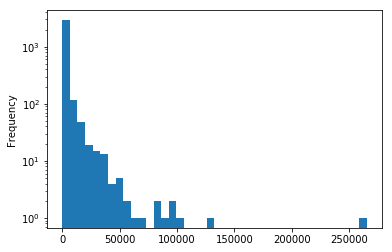

In [6]:
biz[biz["year"] == 2015]["sum"].plot(kind="hist", bins=40,log=True)
plt.show()

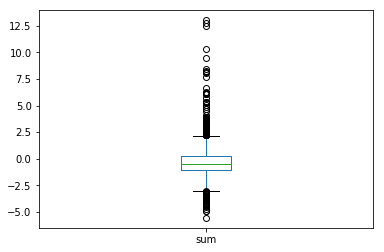

In [7]:
biz_compound.plot(kind="box")
plt.show()

In [8]:
county_map(biz15["sum"], steps=10)

In [9]:
county_map(recession[recession < 0].fillna(0), color="OrRd")

In [10]:
county_map(us_recovery[us_recovery > 0].fillna(0), color="YlGn")

In [11]:
biz_compound.quantile(.675)

0.0

In [12]:
biz.plot()

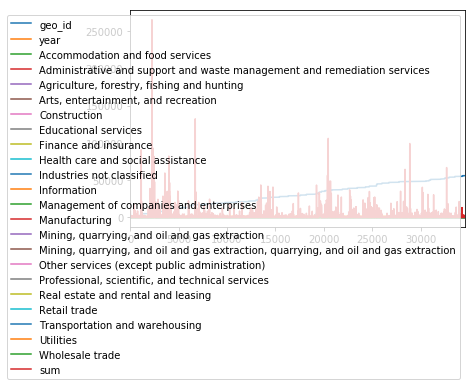

In [13]:
plt.show()

In [14]:
national05 = biz[biz["year"] == 2005].groupby("year").sum().drop("geo_id", 1).drop("sum", 1)
national15 = biz[biz["year"] == 2015].groupby("year").sum().drop("geo_id", 1).drop("sum", 1)

In [15]:
national05

Accommodation and food services  \
year                                    
2005                           603425   

      Administrative and support and waste management and remediation services  \
year                                                                             
2005                                             368360                          

      Agriculture, forestry, fishing and hunting  \
year                                               
2005                                       24084   

      Arts, entertainment, and recreation  Construction  Educational services  \
year                                                                            
2005                               121775        787553                 80439   

      Finance and insurance  Health care and social assistance  \
year                                                             
2005                 474208                             746453   

      Industries not classified  Information       ...         Manufacturing  \
year                                               ...                         
2005                      23987       140961       ...                333450   

      Mining, quarrying, and oil and gas extraction   \
year                                                   
2005                                           23311   

      Mining, quarrying, and oil and gas extraction, quarrying, and oil and gas extraction  \
year                                                                                         
2005                                                  2                                      

      Other services (except public administration)  \
year                                                  
2005                                         740003   

      Professional, scientific, and technical services  \
year                                                     
2005                                            825179   

      Real estate and rental and leasing  Retail trade  \
year                                                     
2005                              370624       1123144   

      Transportation and warehousing  Utilities  Wholesale trade  
year                                                              
2005                          211058      17300           428010  

[1 rows x 21 columns]

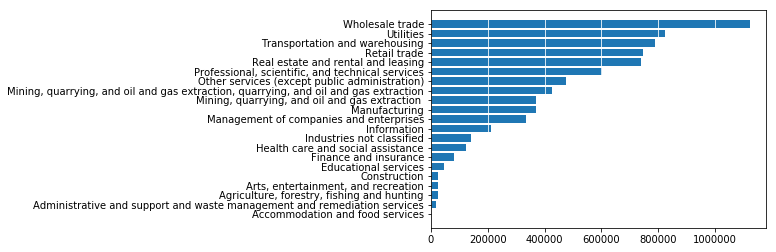

In [16]:
plt.barh(y=national05.columns, width=national05.sort_values(by=2005, axis=1).loc[2005])

plt.grid(color="w", axis="x")
plt.show()

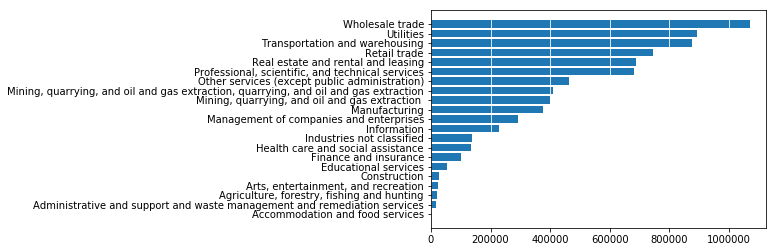

In [17]:
plt.barh(y=national15.columns, width=national15.sort_values(by=2015, axis=1).loc[2015])

plt.grid(color="w", axis="x")
plt.show()

In [18]:
national = biz.groupby("year").sum().drop("geo_id", 1)
national["sum"] = national.sum(axis=1)

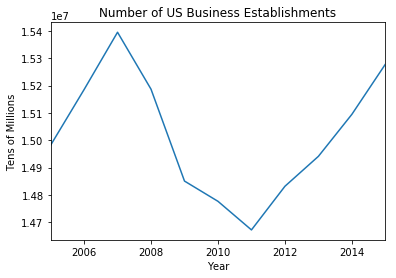

In [19]:
plt.clf()
national["sum"].plot()
plt.ylabel('Tens of Millions')
plt.xlabel('Year')
plt.title('Number of US Business Establishments')

plt.show()

In [20]:
national15.columns

Index(['Accommodation and food services',
       'Administrative and support and waste management and remediation services',
       'Agriculture, forestry, fishing and hunting',
       'Arts, entertainment, and recreation', 'Construction',
       'Educational services', 'Finance and insurance',
       'Health care and social assistance', 'Industries not classified',
       'Information', 'Management of companies and enterprises',
       'Manufacturing', 'Mining, quarrying, and oil and gas extraction ',
       'Mining, quarrying, and oil and gas extraction, quarrying, and oil and gas extraction',
       'Other services (except public administration)',
       'Professional, scientific, and technical services',
       'Real estate and rental and leasing', 'Retail trade',
       'Transportation and warehousing', 'Utilities', 'Wholesale trade'],
      dtype='object')

In [21]:
biz[biz["year"] == 2015]

geo_id  year  Accommodation and food services  \
10       1001  2015                               91   
21       1003  2015                              503   
32       1005  2015                               50   
43       1007  2015                               14   
54       1009  2015                               43   
65       1011  2015                                7   
76       1013  2015                               37   
87       1015  2015                              217   
98       1017  2015                               45   
109      1019  2015                               33   
120      1021  2015                               52   
131      1023  2015                               17   
142      1025  2015                               49   
153      1027  2015                               10   
164      1029  2015                               11   
175      1031  2015                               94   
186      1033  2015                              105   
197      1035  2015                               14   
208      1037  2015                                2   
219      1039  2015                               50   
230      1041  2015                               14   
241      1043  2015                              128   
252      1045  2015                               82   
263      1047  2015                               51   
274      1049  2015                               90   
285      1051  2015                              103   
296      1053  2015                               54   
307      1055  2015                              182   
318      1057  2015                               18   
329      1059  2015                               37   
...       ...   ...                              ...   
34242   55129  2015                               84   
34253   55131  2015                              254   
34264   55133  2015                              845   
34275   55135  2015                              143   
34286   55137  2015                               64   
34297   55139  2015                              373   
34308   55141  2015                              181   
34319   56001  2015                              118   
34330   56003  2015                               31   
34341   56005  2015                              119   
34352   56007  2015                               82   
34363   56009  2015                               38   
34374   56011  2015                               31   
34385   56013  2015                              127   
34396   56015  2015                               32   
34407   56017  2015                               24   
34418   56019  2015                               42   
34429   56021  2015                              213   
34440   56023  2015                               58   
34451   56025  2015                              192   
34462   56027  2015                               11   
34473   56029  2015                              124   
34484   56031  2015                               34   
34495   56033  2015                              113   
34506   56035  2015                               42   
34517   56037  2015                              114   
34528   56039  2015                              188   
34539   56041  2015                               50   
34550   56043  2015                               33   
34561   56045  2015                               25   

       Administrative and support and waste management and remediation services  \
10                                                    25                          
21                                                   256                          
32                                                    10                          
43                                                    10                          
54                                                    23                          
65                                  

In [22]:
national15

Accommodation and food services  \
year                                    
2015                           687560   

      Administrative and support and waste management and remediation services  \
year                                                                             
2015                                             398793                          

      Agriculture, forestry, fishing and hunting  \
year                                               
2015                                       22335   

      Arts, entertainment, and recreation  Construction  Educational services  \
year                                                                            
2015                               133571        682109                101619   

      Finance and insurance  Health care and social assistance  \
year                                                             
2015                 464739                             875475   

      Industries not classified  Information       ...         Manufacturing  \
year                                               ...                         
2015                      20361       137681       ...                292819   

      Mining, quarrying, and oil and gas extraction   \
year                                                   
2015                                               0   

      Mining, quarrying, and oil and gas extraction, quarrying, and oil and gas extraction  \
year                                                                                         
2015                                              28442                                      

      Other services (except public administration)  \
year                                                  
2015                                         745716   

      Professional, scientific, and technical services  \
year                                                     
2015                                            892496   

      Real estate and rental and leasing  Retail trade  \
year                                                     
2015                              377417       1069986   

      Transportation and warehousing  Utilities  Wholesale trade  
year                                                              
2015                          228197      17917           408387  

[1 rows x 21 columns]

In [23]:
national15.sort_values(by=2015, axis=1)

Mining, quarrying, and oil and gas extraction   Utilities  \
year                                                              
2015                                               0      17917   

      Industries not classified  Agriculture, forestry, fishing and hunting  \
year                                                                          
2015                      20361                                       22335   

      Mining, quarrying, and oil and gas extraction, quarrying, and oil and gas extraction  \
year                                                                                         
2015                                              28442                                      

      Management of companies and enterprises  Educational services  \
year                                                                  
2015                                    53466                101619   

      Arts, entertainment, and recreation  Information  \
year                                                     
2015                               133571       137681   

      Transportation and warehousing      ...       \
year                                      ...        
2015                          228197      ...        

      Real estate and rental and leasing  \
year                                       
2015                              377417   

      Administrative and support and waste management and remediation services  \
year                                                                             
2015                                             398793                          

      Wholesale trade  Finance and insurance  Construction  \
year                                                         
2015           408387                 464739        682109   

      Accommodation and food services  \
year                                    
2015                           687560   

      Other services (except public administration)  \
year                                                  
2015                                         745716   

      Health care and social assistance  \
year                                      
2015                             875475   

      Professional, scientific, and technical services  Retail trade  
year                                                                  
2015                                            892496       1069986  

[1 rows x 21 columns]

In [24]:
biz.columns

Index(['geo_id', 'year', 'Accommodation and food services',
       'Administrative and support and waste management and remediation services',
       'Agriculture, forestry, fishing and hunting',
       'Arts, entertainment, and recreation', 'Construction',
       'Educational services', 'Finance and insurance',
       'Health care and social assistance', 'Industries not classified',
       'Information', 'Management of companies and enterprises',
       'Manufacturing', 'Mining, quarrying, and oil and gas extraction ',
       'Mining, quarrying, and oil and gas extraction, quarrying, and oil and gas extraction',
       'Other services (except public administration)',
       'Professional, scientific, and technical services',
       'Real estate and rental and leasing', 'Retail trade',
       'Transportation and warehousing', 'Utilities', 'Wholesale trade',
       'sum'],
      dtype='object')